This notebook includes analysis of time series data, and correlation between variables. With correlated variables two different dataset has created. For plots and visuals, seaborn library was used.  

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Conductivity

## 1. Dataset

In [ ]:
conductivity=pd.read_json('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_Conductuvity_Daily_1Y.json', dtype_backend="numpy_nullable")

In [35]:
nan_or_empty = conductivity[
    conductivity.isna().any(axis=1) | (conductivity == '').any(axis=1)]

for entry in conductivity.loc['timeSeries', 'value']:
    for value_entry in entry['values'][0]['value']:
        print(f"dateTime: {value_entry['dateTime']}, value: {value_entry['value']}")

dateTime: 2024-06-13T00:00:00.000, value: 304
dateTime: 2024-06-15T00:00:00.000, value: 309
dateTime: 2024-06-16T00:00:00.000, value: 308
dateTime: 2024-06-17T00:00:00.000, value: 308
dateTime: 2024-06-18T00:00:00.000, value: 308
dateTime: 2024-06-19T00:00:00.000, value: 307
dateTime: 2024-06-20T00:00:00.000, value: 307
dateTime: 2024-06-21T00:00:00.000, value: 307
dateTime: 2024-06-22T00:00:00.000, value: 307
dateTime: 2024-06-23T00:00:00.000, value: 307
dateTime: 2024-06-24T00:00:00.000, value: 307
dateTime: 2024-06-25T00:00:00.000, value: 306
dateTime: 2024-06-26T00:00:00.000, value: 306
dateTime: 2024-06-27T00:00:00.000, value: 306
dateTime: 2024-06-28T00:00:00.000, value: 306
dateTime: 2024-06-29T00:00:00.000, value: 305
dateTime: 2024-06-30T00:00:00.000, value: 305
dateTime: 2024-07-01T00:00:00.000, value: 305
dateTime: 2024-07-02T00:00:00.000, value: 304
dateTime: 2024-07-03T00:00:00.000, value: 303
dateTime: 2024-07-04T00:00:00.000, value: 300
dateTime: 2024-07-05T00:00:00.000,

In [36]:
Time_cond_data = conductivity.loc['timeSeries', 'value']
records = []
for ts in Time_cond_data:
    for value_entry in ts['values'][0]['value']:
        records.append({
            'dateTime': value_entry['dateTime'],
            'Conductivity': float(value_entry['value']) ## float alinmis aslinda
        })

# Create DataFrame directly
df = pd.DataFrame(records)
df['timestamps'] = pd.to_datetime(df['dateTime'])
print(df)

                    dateTime  Conductivity timestamps
0    2024-06-13T00:00:00.000         304.0 2024-06-13
1    2024-06-15T00:00:00.000         309.0 2024-06-15
2    2024-06-16T00:00:00.000         308.0 2024-06-16
3    2024-06-17T00:00:00.000         308.0 2024-06-17
4    2024-06-18T00:00:00.000         308.0 2024-06-18
..                       ...           ...        ...
356  2025-06-08T00:00:00.000         298.0 2025-06-08
357  2025-06-09T00:00:00.000         299.0 2025-06-09
358  2025-06-10T00:00:00.000         298.0 2025-06-10
359  2025-06-11T00:00:00.000         298.0 2025-06-11
360  2025-06-12T00:00:00.000         298.0 2025-06-12

[361 rows x 3 columns]


In [37]:
df=df.drop(columns=['dateTime'])
print(df)

     Conductivity timestamps
0           304.0 2024-06-13
1           309.0 2024-06-15
2           308.0 2024-06-16
3           308.0 2024-06-17
4           308.0 2024-06-18
..            ...        ...
356         298.0 2025-06-08
357         299.0 2025-06-09
358         298.0 2025-06-10
359         298.0 2025-06-11
360         298.0 2025-06-12

[361 rows x 2 columns]


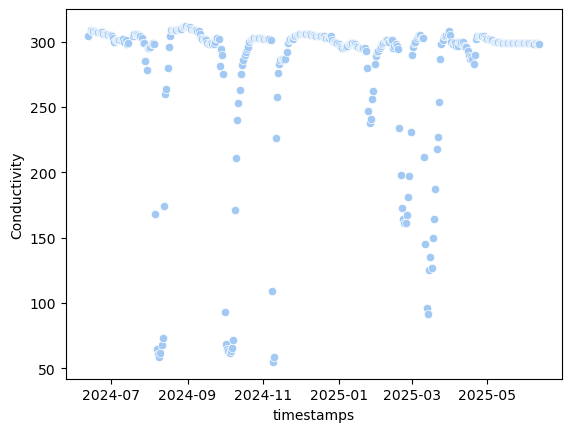

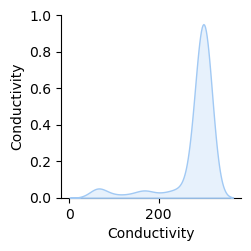

In [38]:
sns.scatterplot(data=df, x='timestamps', y='Conductivity')
sns.pairplot(df, vars=['Conductivity'], diag_kind='kde')
plt.show()

## Stream water level elevation

In [ ]:
waterlevel=pd.read_json('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_Water_Level_Daily_1Y.json', dtype_backend="numpy_nullable")
waterlevel.info()
print(waterlevel.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, queryInfo to timeSeries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2 non-null      string 
 1   declaredType     2 non-null      string 
 2   scope            2 non-null      string 
 3   value            2 non-null      object 
 4   nil              2 non-null      boolean
 5   globalScope      2 non-null      boolean
 6   typeSubstituted  2 non-null      boolean
dtypes: boolean(3), object(1), string(3)
memory usage: 92.0+ bytes
Index(['name', 'declaredType', 'scope', 'value', 'nil', 'globalScope',
       'typeSubstituted'],
      dtype='object')


In [40]:
nan_or_empty = waterlevel[
    waterlevel.isna().any(axis=1) | (waterlevel == '').any(axis=1)]

for entry in waterlevel.loc['timeSeries', 'value']:
    for value_entry in entry['values'][0]['value']:
        print(f"dateTime: {value_entry['dateTime']}, value: {value_entry['value']}")

dateTime: 2024-06-13T00:00:00.000, value: 43.53
dateTime: 2024-06-14T00:00:00.000, value: 43.31
dateTime: 2024-06-15T00:00:00.000, value: 43.08
dateTime: 2024-06-16T00:00:00.000, value: 42.87
dateTime: 2024-06-17T00:00:00.000, value: 42.68
dateTime: 2024-06-18T00:00:00.000, value: 42.54
dateTime: 2024-06-19T00:00:00.000, value: 42.38
dateTime: 2024-06-20T00:00:00.000, value: 42.25
dateTime: 2024-06-21T00:00:00.000, value: 42.17
dateTime: 2024-06-22T00:00:00.000, value: 42.09
dateTime: 2024-06-23T00:00:00.000, value: 42.01
dateTime: 2024-06-24T00:00:00.000, value: 41.93
dateTime: 2024-06-25T00:00:00.000, value: 41.88
dateTime: 2024-06-26T00:00:00.000, value: 41.83
dateTime: 2024-06-27T00:00:00.000, value: 41.76
dateTime: 2024-06-28T00:00:00.000, value: 41.71
dateTime: 2024-06-29T00:00:00.000, value: 41.66
dateTime: 2024-06-30T00:00:00.000, value: 41.70
dateTime: 2024-07-01T00:00:00.000, value: 41.64
dateTime: 2024-07-02T00:00:00.000, value: 41.78
dateTime: 2024-07-03T00:00:00.000, value

In [41]:
Time_cond_data = waterlevel.loc['timeSeries', 'value']
records = []
for ts in Time_cond_data:
    for value_entry in ts['values'][0]['value']:
        records.append({
            'dateTime': value_entry['dateTime'],
            'Water_Level': float(value_entry['value']) ## float alinmis aslinda
        })

# Create DataFrame directly
df2 = pd.DataFrame(records)
df2['timestamps'] = pd.to_datetime(df2['dateTime'])
print(df2)

                    dateTime  Water_Level timestamps
0    2024-06-13T00:00:00.000        43.53 2024-06-13
1    2024-06-14T00:00:00.000        43.31 2024-06-14
2    2024-06-15T00:00:00.000        43.08 2024-06-15
3    2024-06-16T00:00:00.000        42.87 2024-06-16
4    2024-06-17T00:00:00.000        42.68 2024-06-17
..                       ...          ...        ...
358  2025-06-08T00:00:00.000        40.77 2025-06-08
359  2025-06-09T00:00:00.000        40.78 2025-06-09
360  2025-06-10T00:00:00.000        40.81 2025-06-10
361  2025-06-11T00:00:00.000        40.81 2025-06-11
362  2025-06-12T00:00:00.000        40.84 2025-06-12

[363 rows x 3 columns]


In [42]:
df2=df2.drop(columns=['dateTime'])
print(df2)

     Water_Level timestamps
0          43.53 2024-06-13
1          43.31 2024-06-14
2          43.08 2024-06-15
3          42.87 2024-06-16
4          42.68 2024-06-17
..           ...        ...
358        40.77 2025-06-08
359        40.78 2025-06-09
360        40.81 2025-06-10
361        40.81 2025-06-11
362        40.84 2025-06-12

[363 rows x 2 columns]


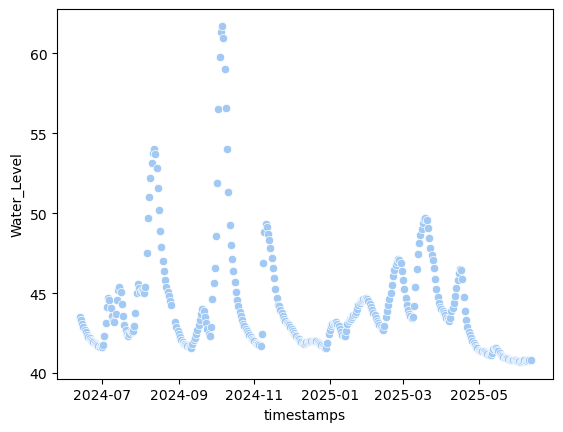

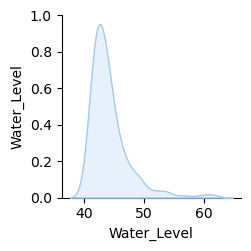

In [43]:
sns.scatterplot(data=df2, x='timestamps', y='Water_Level')
sns.pairplot(df2, vars=['Water_Level'], diag_kind='kde')
plt.show()

## Water level & Conductivity

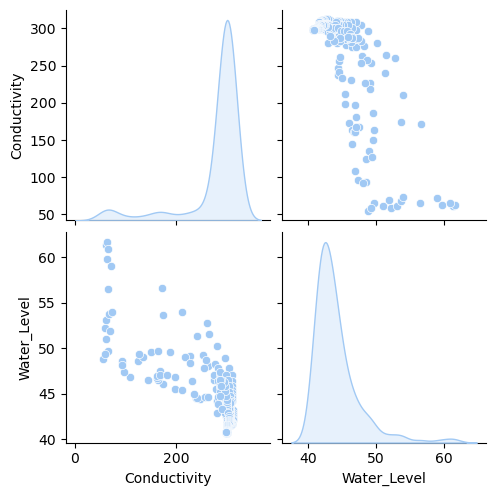

In [44]:
merged = pd.merge(df, df2, on='timestamps', how='inner')
sns.pairplot(merged, vars=['Conductivity', 'Water_Level'], diag_kind='kde')
plt.show()

In [45]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Conductivity  359 non-null    float64       
 1   timestamps    359 non-null    datetime64[ns]
 2   Water_Level   359 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.5 KB


In [46]:
print(merged)

     Conductivity timestamps  Water_Level
0           304.0 2024-06-13        43.53
1           309.0 2024-06-15        43.08
2           308.0 2024-06-16        42.87
3           308.0 2024-06-17        42.68
4           308.0 2024-06-18        42.54
..            ...        ...          ...
354         298.0 2025-06-08        40.77
355         299.0 2025-06-09        40.78
356         298.0 2025-06-10        40.81
357         298.0 2025-06-11        40.81
358         298.0 2025-06-12        40.84

[359 rows x 3 columns]


In [47]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

# ax1.scatter(merged['timestamps'], merged['Conductivity'], color='b', label='Conductivity', alpha=0.7)
# ax1.set_ylabel('Conductivity', color='b')
# ax1.set_xlabel('Date')

# ax2 = ax1.twinx()
# ax2.scatter(merged['timestamps'], merged['Water_Level'], color='g', label='Water Level', alpha=0.7)
# ax2.set_ylabel('Water Level', color='g')

# plt.title('Conductivity and Water Level Over Time (Scatter)')
# plt.show()

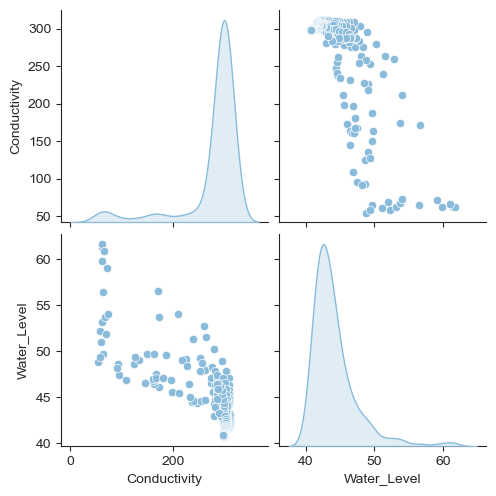

In [48]:
sns.set_style('ticks')
sns.set_palette('Blues_d')
ax = sns.pairplot(merged, x_vars=['timestamps'], vars=['Conductivity', 'Water_Level'], diag_kind='kde')

## Dissolved Oxygen

In [ ]:
Dissolvedoxygen=pd.read_json('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_DissolvedOxygen_Daily_1Y.json', dtype_backend="numpy_nullable")
Dissolvedoxygen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, queryInfo to timeSeries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2 non-null      string 
 1   declaredType     2 non-null      string 
 2   scope            2 non-null      string 
 3   value            2 non-null      object 
 4   nil              2 non-null      boolean
 5   globalScope      2 non-null      boolean
 6   typeSubstituted  2 non-null      boolean
dtypes: boolean(3), object(1), string(3)
memory usage: 92.0+ bytes


In [50]:
nan_or_empty = Dissolvedoxygen[
    Dissolvedoxygen.isna().any(axis=1) | (Dissolvedoxygen == '').any(axis=1)]

for entry in Dissolvedoxygen.loc['timeSeries', 'value']:
    for value_entry in entry['values'][0]['value']:
        print(f"dateTime: {value_entry['dateTime']}, value: {value_entry['value']}")

dateTime: 2024-06-13T00:00:00.000, value: 2.3
dateTime: 2024-06-15T00:00:00.000, value: 2.2
dateTime: 2024-06-16T00:00:00.000, value: 2.2
dateTime: 2024-06-17T00:00:00.000, value: 2.2
dateTime: 2024-06-18T00:00:00.000, value: 2.2
dateTime: 2024-06-19T00:00:00.000, value: 2.2
dateTime: 2024-06-20T00:00:00.000, value: 2.2
dateTime: 2024-06-21T00:00:00.000, value: 2.2
dateTime: 2024-06-22T00:00:00.000, value: 2.2
dateTime: 2024-06-23T00:00:00.000, value: 2.2
dateTime: 2024-06-24T00:00:00.000, value: 2.2
dateTime: 2024-06-25T00:00:00.000, value: 2.2
dateTime: 2024-06-26T00:00:00.000, value: 2.2
dateTime: 2024-06-27T00:00:00.000, value: 2.2
dateTime: 2024-06-28T00:00:00.000, value: 2.2
dateTime: 2024-06-29T00:00:00.000, value: 2.2
dateTime: 2024-06-30T00:00:00.000, value: 2.2
dateTime: 2024-07-01T00:00:00.000, value: 2.2
dateTime: 2024-07-02T00:00:00.000, value: 2.2
dateTime: 2024-07-03T00:00:00.000, value: 2.2
dateTime: 2024-07-04T00:00:00.000, value: 2.3
dateTime: 2024-07-05T00:00:00.000,

In [51]:
Time_cond_data = Dissolvedoxygen.loc['timeSeries', 'value']
records = []
for ts in Time_cond_data:
    for value_entry in ts['values'][0]['value']:
        records.append({
            'dateTime': value_entry['dateTime'],
            'Dissolved_Oxygen': float(value_entry['value']) ## float alinmis aslinda
        })

# Create DataFrame directly
df3 = pd.DataFrame(records)
df3['timestamps'] = pd.to_datetime(df3['dateTime'])
print(df3)

                    dateTime  Dissolved_Oxygen timestamps
0    2024-06-13T00:00:00.000               2.3 2024-06-13
1    2024-06-15T00:00:00.000               2.2 2024-06-15
2    2024-06-16T00:00:00.000               2.2 2024-06-16
3    2024-06-17T00:00:00.000               2.2 2024-06-17
4    2024-06-18T00:00:00.000               2.2 2024-06-18
..                       ...               ...        ...
356  2025-06-08T00:00:00.000               2.1 2025-06-08
357  2025-06-09T00:00:00.000               2.1 2025-06-09
358  2025-06-10T00:00:00.000               2.1 2025-06-10
359  2025-06-11T00:00:00.000               2.1 2025-06-11
360  2025-06-12T00:00:00.000               2.1 2025-06-12

[361 rows x 3 columns]


In [52]:
df3=df3.drop(columns=['dateTime'])
print(df3)

     Dissolved_Oxygen timestamps
0                 2.3 2024-06-13
1                 2.2 2024-06-15
2                 2.2 2024-06-16
3                 2.2 2024-06-17
4                 2.2 2024-06-18
..                ...        ...
356               2.1 2025-06-08
357               2.1 2025-06-09
358               2.1 2025-06-10
359               2.1 2025-06-11
360               2.1 2025-06-12

[361 rows x 2 columns]


## Merging Dissolved Oxygen with Conductivity + Water Level

In [53]:
merged = pd.merge(merged, df3, on='timestamps', how='inner')
print(merged)

     Conductivity timestamps  Water_Level  Dissolved_Oxygen
0           304.0 2024-06-13        43.53               2.3
1           309.0 2024-06-15        43.08               2.2
2           308.0 2024-06-16        42.87               2.2
3           308.0 2024-06-17        42.68               2.2
4           308.0 2024-06-18        42.54               2.2
..            ...        ...          ...               ...
354         298.0 2025-06-08        40.77               2.1
355         299.0 2025-06-09        40.78               2.1
356         298.0 2025-06-10        40.81               2.1
357         298.0 2025-06-11        40.81               2.1
358         298.0 2025-06-12        40.84               2.1

[359 rows x 4 columns]


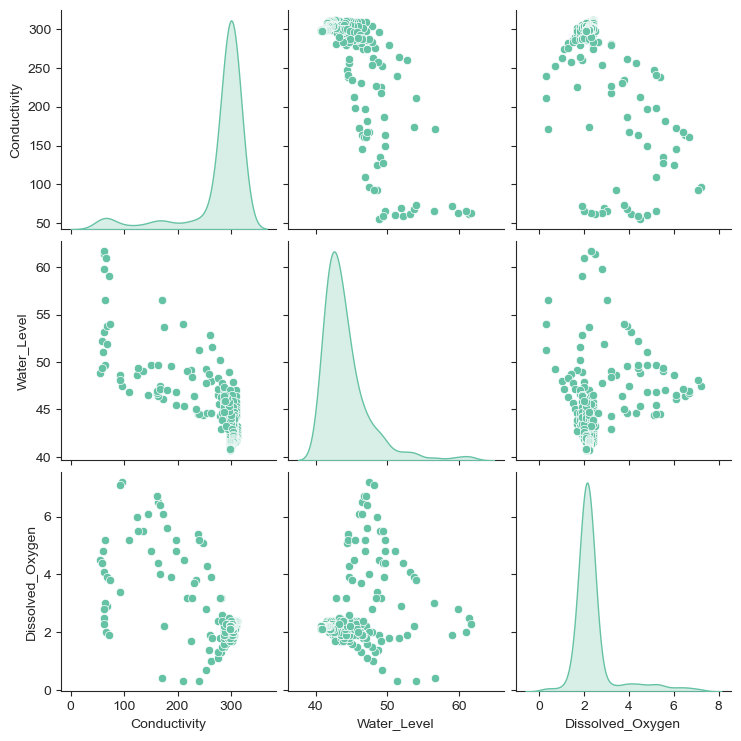

In [54]:
sns.set_palette("Set2")
sns.pairplot(merged, vars=['Conductivity', 'Water_Level', 'Dissolved_Oxygen'], diag_kind='kde')
plt.show()

## PH

In [ ]:
ph=pd.read_json('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_Ph_Daily_1Y.json', dtype_backend="numpy_nullable")

In [56]:
nan_or_empty = ph[
    ph.isna().any(axis=1) | (ph == '').any(axis=1)]

for entry in ph.loc['timeSeries', 'value']:
    for value_entry in entry['values'][0]['value']:
        print(f"dateTime: {value_entry['dateTime']}, value: {value_entry['value']}")

dateTime: 2024-06-13T00:00:00.000, value: 7.4
dateTime: 2024-06-15T00:00:00.000, value: 7.6
dateTime: 2024-06-16T00:00:00.000, value: 7.6
dateTime: 2024-06-17T00:00:00.000, value: 7.6
dateTime: 2024-06-18T00:00:00.000, value: 7.6
dateTime: 2024-06-19T00:00:00.000, value: 7.6
dateTime: 2024-06-20T00:00:00.000, value: 7.6
dateTime: 2024-06-21T00:00:00.000, value: 7.6
dateTime: 2024-06-22T00:00:00.000, value: 7.6
dateTime: 2024-06-23T00:00:00.000, value: 7.6
dateTime: 2024-06-24T00:00:00.000, value: 7.6
dateTime: 2024-06-25T00:00:00.000, value: 7.6
dateTime: 2024-06-26T00:00:00.000, value: 7.6
dateTime: 2024-06-27T00:00:00.000, value: 7.7
dateTime: 2024-06-28T00:00:00.000, value: 7.7
dateTime: 2024-06-29T00:00:00.000, value: 7.7
dateTime: 2024-06-30T00:00:00.000, value: 7.7
dateTime: 2024-07-01T00:00:00.000, value: 7.7
dateTime: 2024-07-02T00:00:00.000, value: 7.7
dateTime: 2024-07-03T00:00:00.000, value: 7.7
dateTime: 2024-07-04T00:00:00.000, value: 7.7
dateTime: 2024-07-05T00:00:00.000,

In [57]:
Time_cond_data = ph.loc['timeSeries', 'value']
records = []
for ts in Time_cond_data:
    for value_entry in ts['values'][0]['value']:
        records.append({
            'dateTime': value_entry['dateTime'],
            'Ph': float(value_entry['value']) ## float alinmis aslinda
        })

# Create DataFrame directly
df4 = pd.DataFrame(records)
df4['timestamps'] = pd.to_datetime(df4['dateTime'])
print(df4)

                    dateTime   Ph timestamps
0    2024-06-13T00:00:00.000  7.4 2024-06-13
1    2024-06-15T00:00:00.000  7.6 2024-06-15
2    2024-06-16T00:00:00.000  7.6 2024-06-16
3    2024-06-17T00:00:00.000  7.6 2024-06-17
4    2024-06-18T00:00:00.000  7.6 2024-06-18
..                       ...  ...        ...
354  2025-06-08T00:00:00.000  7.8 2025-06-08
355  2025-06-09T00:00:00.000  7.8 2025-06-09
356  2025-06-10T00:00:00.000  7.8 2025-06-10
357  2025-06-11T00:00:00.000  7.8 2025-06-11
358  2025-06-12T00:00:00.000  7.8 2025-06-12

[359 rows x 3 columns]


In [58]:
df4=df4.drop(columns=['dateTime'])
print(df4)

      Ph timestamps
0    7.4 2024-06-13
1    7.6 2024-06-15
2    7.6 2024-06-16
3    7.6 2024-06-17
4    7.6 2024-06-18
..   ...        ...
354  7.8 2025-06-08
355  7.8 2025-06-09
356  7.8 2025-06-10
357  7.8 2025-06-11
358  7.8 2025-06-12

[359 rows x 2 columns]


## PH merged with Conductivity + Water Level+ Dissolved Oxygen

In [59]:
merged = pd.merge(merged, df4, on='timestamps', how='inner')
print(merged)

     Conductivity timestamps  Water_Level  Dissolved_Oxygen   Ph
0           304.0 2024-06-13        43.53               2.3  7.4
1           309.0 2024-06-15        43.08               2.2  7.6
2           308.0 2024-06-16        42.87               2.2  7.6
3           308.0 2024-06-17        42.68               2.2  7.6
4           308.0 2024-06-18        42.54               2.2  7.6
..            ...        ...          ...               ...  ...
352         298.0 2025-06-08        40.77               2.1  7.8
353         299.0 2025-06-09        40.78               2.1  7.8
354         298.0 2025-06-10        40.81               2.1  7.8
355         298.0 2025-06-11        40.81               2.1  7.8
356         298.0 2025-06-12        40.84               2.1  7.8

[357 rows x 5 columns]


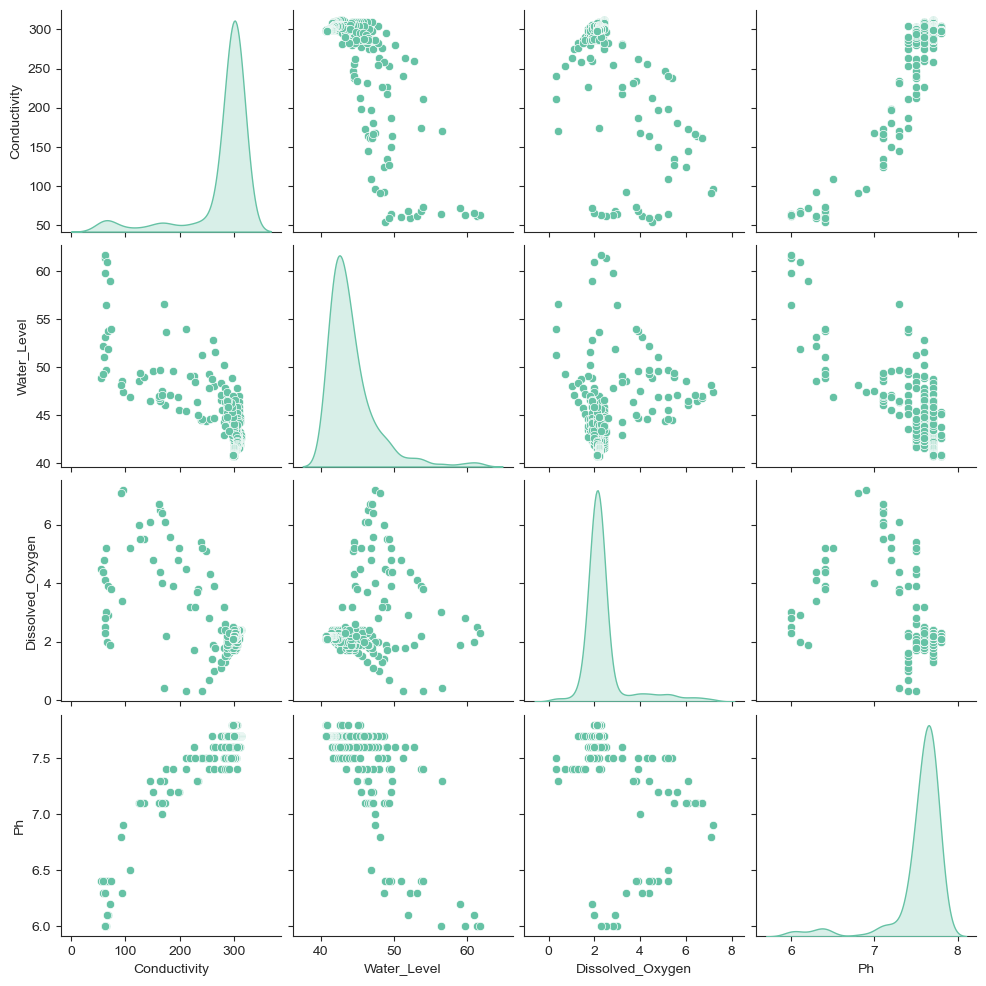

In [60]:
sns.set_palette("Set2")
sns.pairplot(merged, vars=['Conductivity', 'Water_Level', 'Dissolved_Oxygen','Ph'], diag_kind='kde')
plt.show()

## Temperature

In [ ]:
temperature=pd.read_json('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_Temperature_Daily_1Y.json', dtype_backend="numpy_nullable")

In [62]:
temperature.info()
print(temperature.columns)
temperature.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, queryInfo to timeSeries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2 non-null      string 
 1   declaredType     2 non-null      string 
 2   scope            2 non-null      string 
 3   value            2 non-null      object 
 4   nil              2 non-null      boolean
 5   globalScope      2 non-null      boolean
 6   typeSubstituted  2 non-null      boolean
dtypes: boolean(3), object(1), string(3)
memory usage: 92.0+ bytes
Index(['name', 'declaredType', 'scope', 'value', 'nil', 'globalScope',
       'typeSubstituted'],
      dtype='object')


name               0
declaredType       0
scope              0
value              0
nil                0
globalScope        0
typeSubstituted    0
dtype: int64

In [63]:
nan_or_empty = temperature[
    temperature.isna().any(axis=1) | (temperature == '').any(axis=1)]

for entry in temperature.loc['timeSeries', 'value']:
    for value_entry in entry['values'][0]['value']:
        print(f"dateTime: {value_entry['dateTime']}, value: {value_entry['value']}")

dateTime: 2024-06-13T00:00:00.000, value: 21.3
dateTime: 2024-06-15T00:00:00.000, value: 21.3
dateTime: 2024-06-16T00:00:00.000, value: 21.3
dateTime: 2024-06-17T00:00:00.000, value: 21.3
dateTime: 2024-06-18T00:00:00.000, value: 21.3
dateTime: 2024-06-19T00:00:00.000, value: 21.3
dateTime: 2024-06-20T00:00:00.000, value: 21.3
dateTime: 2024-06-21T00:00:00.000, value: 21.3
dateTime: 2024-06-22T00:00:00.000, value: 21.3
dateTime: 2024-06-23T00:00:00.000, value: 21.3
dateTime: 2024-06-24T00:00:00.000, value: 21.3
dateTime: 2024-06-25T00:00:00.000, value: 21.3
dateTime: 2024-06-26T00:00:00.000, value: 21.3
dateTime: 2024-06-27T00:00:00.000, value: 21.3
dateTime: 2024-06-28T00:00:00.000, value: 21.3
dateTime: 2024-06-29T00:00:00.000, value: 21.3
dateTime: 2024-06-30T00:00:00.000, value: 21.3
dateTime: 2024-07-01T00:00:00.000, value: 21.3
dateTime: 2024-07-02T00:00:00.000, value: 21.3
dateTime: 2024-07-03T00:00:00.000, value: 21.3
dateTime: 2024-07-04T00:00:00.000, value: 21.5
dateTime: 202

In [64]:
Time_cond_data = temperature.loc['timeSeries', 'value']
records = []
for ts in Time_cond_data:
    for value_entry in ts['values'][0]['value']:
        records.append({
            'dateTime': value_entry['dateTime'],
            'Temperature': float(value_entry['value']) ## float alinmis aslinda
        })

# Create DataFrame directly
df5 = pd.DataFrame(records)
df5['timestamps'] = pd.to_datetime(df5['dateTime'])
print(df5)

                    dateTime  Temperature timestamps
0    2024-06-13T00:00:00.000         21.3 2024-06-13
1    2024-06-15T00:00:00.000         21.3 2024-06-15
2    2024-06-16T00:00:00.000         21.3 2024-06-16
3    2024-06-17T00:00:00.000         21.3 2024-06-17
4    2024-06-18T00:00:00.000         21.3 2024-06-18
..                       ...          ...        ...
356  2025-06-08T00:00:00.000         21.4 2025-06-08
357  2025-06-09T00:00:00.000         21.4 2025-06-09
358  2025-06-10T00:00:00.000         21.4 2025-06-10
359  2025-06-11T00:00:00.000         21.4 2025-06-11
360  2025-06-12T00:00:00.000         21.4 2025-06-12

[361 rows x 3 columns]


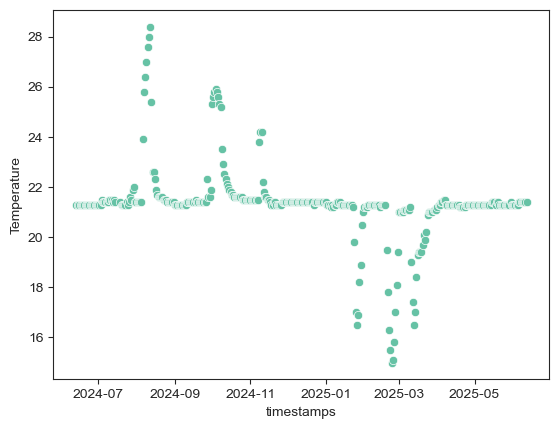

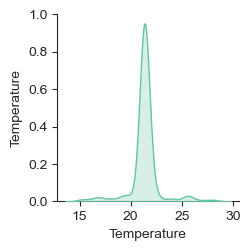

In [65]:
sns.scatterplot(data=df5, x='timestamps', y='Temperature')
sns.pairplot(df5, vars=['Temperature'], diag_kind='kde')
plt.show()

In [66]:
df5=df5.drop(columns=['dateTime'])
print(df5)

     Temperature timestamps
0           21.3 2024-06-13
1           21.3 2024-06-15
2           21.3 2024-06-16
3           21.3 2024-06-17
4           21.3 2024-06-18
..           ...        ...
356         21.4 2025-06-08
357         21.4 2025-06-09
358         21.4 2025-06-10
359         21.4 2025-06-11
360         21.4 2025-06-12

[361 rows x 2 columns]


## Temperature merged with Ph + Conductivity + Water Level + Dissolved Oxygen

In [67]:
merged_final = pd.merge(merged, df5, on='timestamps', how='inner')
print(merged_final)

     Conductivity timestamps  Water_Level  Dissolved_Oxygen   Ph  Temperature
0           304.0 2024-06-13        43.53               2.3  7.4         21.3
1           309.0 2024-06-15        43.08               2.2  7.6         21.3
2           308.0 2024-06-16        42.87               2.2  7.6         21.3
3           308.0 2024-06-17        42.68               2.2  7.6         21.3
4           308.0 2024-06-18        42.54               2.2  7.6         21.3
..            ...        ...          ...               ...  ...          ...
352         298.0 2025-06-08        40.77               2.1  7.8         21.4
353         299.0 2025-06-09        40.78               2.1  7.8         21.4
354         298.0 2025-06-10        40.81               2.1  7.8         21.4
355         298.0 2025-06-11        40.81               2.1  7.8         21.4
356         298.0 2025-06-12        40.84               2.1  7.8         21.4

[357 rows x 6 columns]


In [68]:
# Convert time to minutes from the first timestamp
import numpy as np
import datetime
from datetime import datetime

t_string = merged_final.iloc[:, 1].values
t = []
t_0 = 0
for i in range(len(t_string)):
    # Convert numpy.datetime64 to pandas.Timestamp, then to python datetime
    a = pd.Timestamp(t_string[i]).to_pydatetime()
    if i == 0:
        t_0 = a.timestamp()
        print(t_0)
    dk = (a.timestamp()-t_0) / 60
    t.append(dk)
    print(dk)
minute_time = np.array(t)

1718229600.0
0.0
2880.0
4320.0
5760.0
7200.0
8640.0
10080.0
11520.0
12960.0
14400.0
15840.0
17280.0
18720.0
20160.0
21600.0
23040.0
24480.0
25920.0
27360.0
28800.0
30240.0
31680.0
33120.0
34560.0
36000.0
37440.0
38880.0
40320.0
41760.0
43200.0
44640.0
46080.0
51840.0
53280.0
54720.0
56160.0
57600.0
59040.0
60480.0
61920.0
63360.0
64800.0
66240.0
67680.0
69120.0
70560.0
72000.0
73440.0
74880.0
76320.0
77760.0
79200.0
80640.0
82080.0
83520.0
84960.0
86400.0
87840.0
89280.0
90720.0
92160.0
93600.0
95040.0
96480.0
97920.0
99360.0
100800.0
102240.0
103680.0
105120.0
106560.0
110880.0
112320.0
113760.0
115200.0
116640.0
118080.0
119520.0
120960.0
122400.0
123840.0
125280.0
126720.0
128160.0
131040.0
132480.0
133920.0
135360.0
136800.0
138240.0
139680.0
141120.0
142560.0
144000.0
145440.0
146880.0
148320.0
149760.0
151200.0
152640.0
154080.0
155520.0
156960.0
158400.0
159840.0
161280.0
162720.0
164160.0
165600.0
167040.0
168480.0
169920.0
171360.0
172800.0
174240.0
175680.0
177120.0
178560.0


In [69]:
merged_final['dk'] = minute_time
dk_merged = merged_final
print(dk_merged)

     Conductivity timestamps  Water_Level  Dissolved_Oxygen   Ph  Temperature  \
0           304.0 2024-06-13        43.53               2.3  7.4         21.3   
1           309.0 2024-06-15        43.08               2.2  7.6         21.3   
2           308.0 2024-06-16        42.87               2.2  7.6         21.3   
3           308.0 2024-06-17        42.68               2.2  7.6         21.3   
4           308.0 2024-06-18        42.54               2.2  7.6         21.3   
..            ...        ...          ...               ...  ...          ...   
352         298.0 2025-06-08        40.77               2.1  7.8         21.4   
353         299.0 2025-06-09        40.78               2.1  7.8         21.4   
354         298.0 2025-06-10        40.81               2.1  7.8         21.4   
355         298.0 2025-06-11        40.81               2.1  7.8         21.4   
356         298.0 2025-06-12        40.84               2.1  7.8         21.4   

           dk  
0         0

In [70]:
dk_merged.to_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv', index=False)

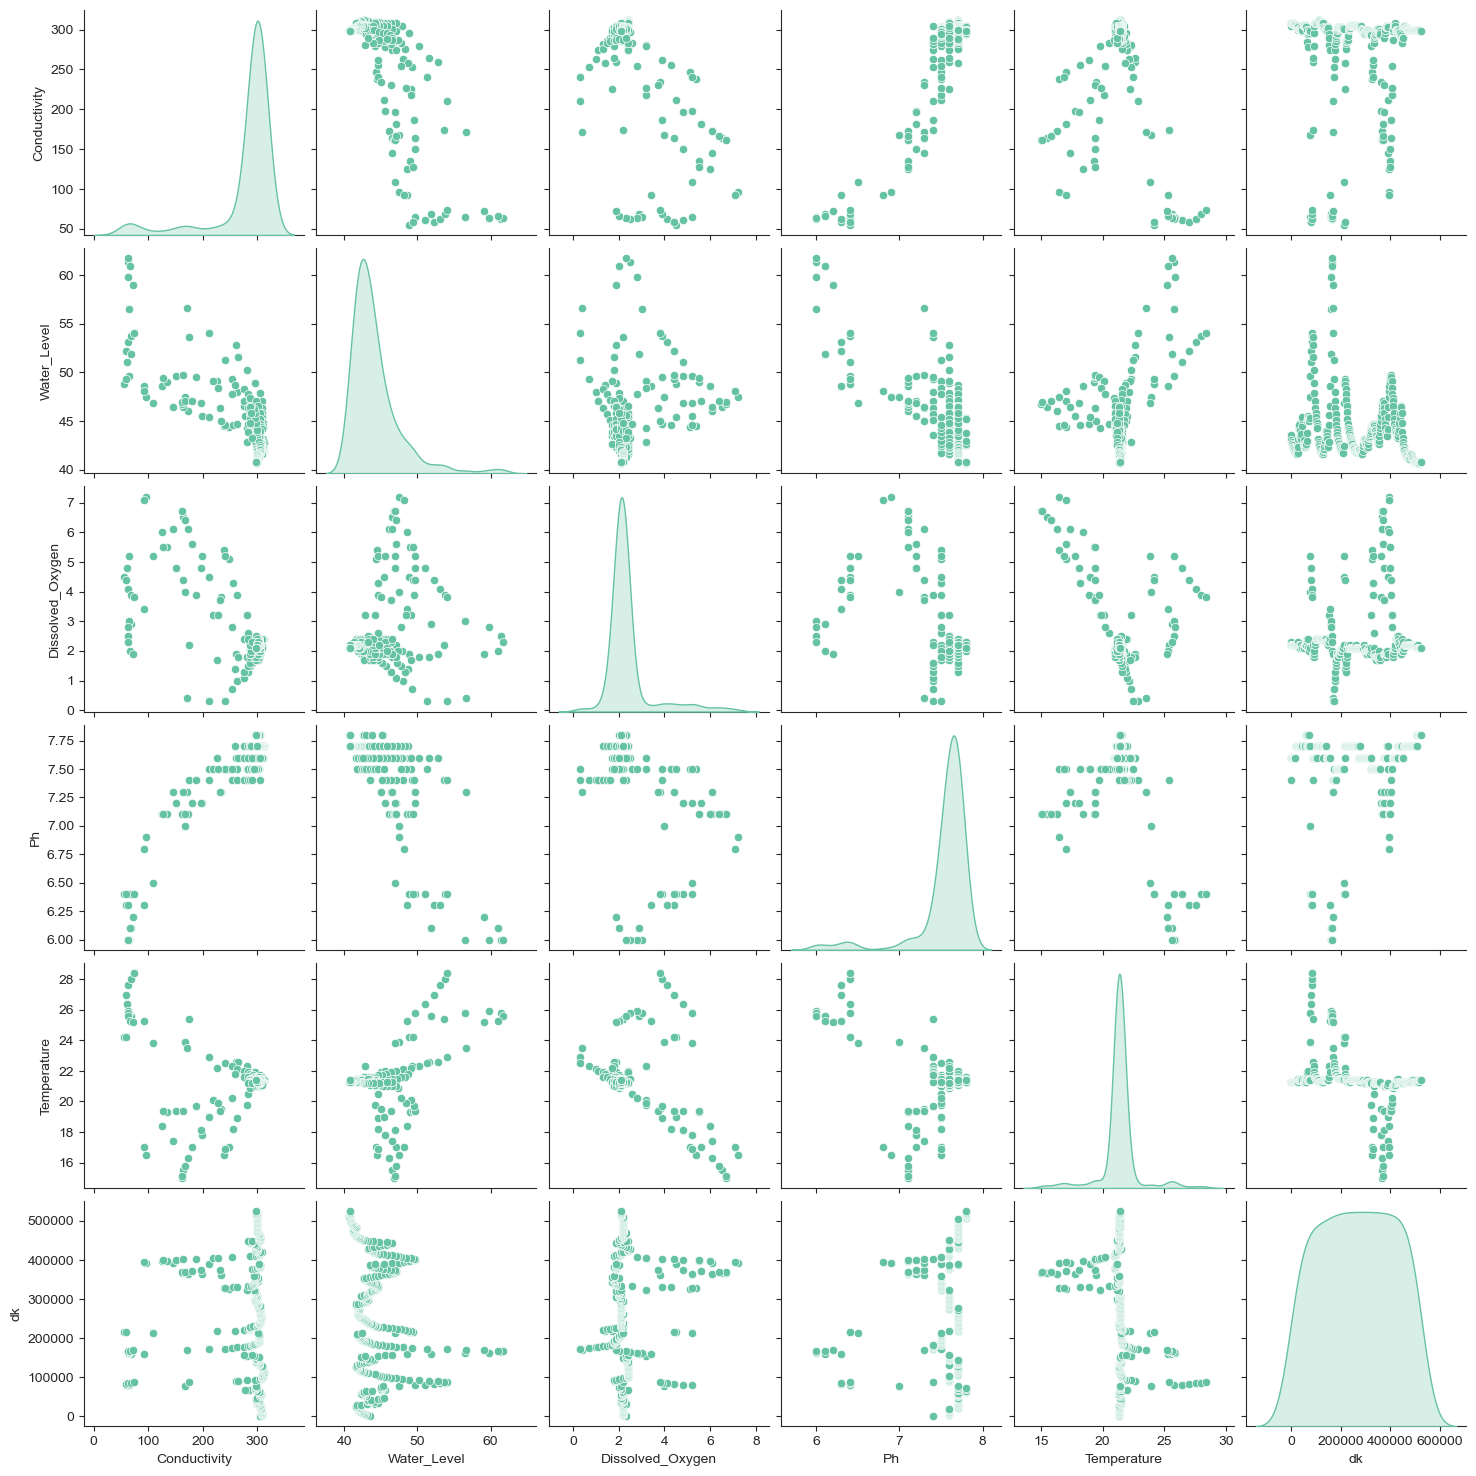

In [71]:
sns.set_palette("Set2")
sns.pairplot(
    dk_merged,
    vars=['Conductivity', 'Water_Level', 'Dissolved_Oxygen', 'Ph', 'Temperature', 'dk'],
    diag_kind='kde'
)


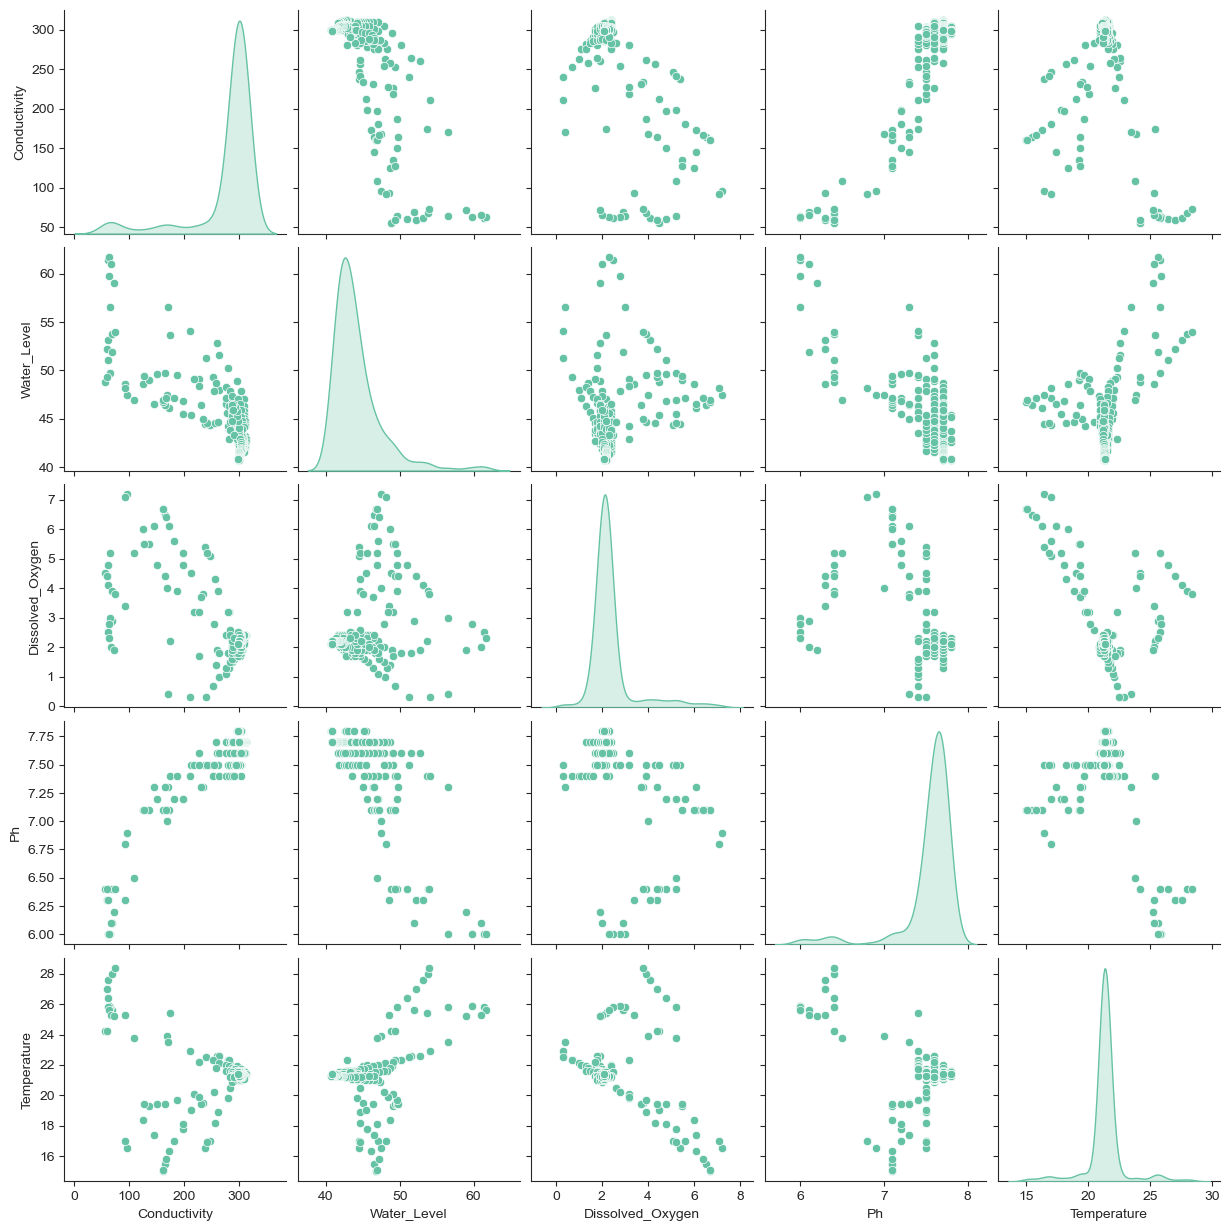

In [72]:
sns.pairplot(merged_final, x_vars=['dk'], vars=['Conductivity', 'Water_Level', 'Dissolved_Oxygen', 'Ph', 'Temperature'], diag_kind='kde')
plt.show()

## 2. Dataset 

## Nitrate

In [73]:
import pandas as pd

In [ ]:
nitrate=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_Nitrate_Cont_30Days.csv', sep=';', dtype_backend="numpy_nullable")
print(nitrate)
print(nitrate.columns)

     month_nu  day_nu  begin_yr  end_yr  count_nu  p50_va
0           1       1      2018    2023         4    1.75
1           1       2      2018    2023         3    1.72
2           1       3      2018    2023         3    1.71
3           1       4      2018    2023         3     1.7
4           1       5      2018    2023         3     1.7
..        ...     ...       ...     ...       ...     ...
360        12      27      2016    2023         6    1.75
361        12      28      2016    2023         5    1.76
362        12      29      2016    2023         5    1.75
363        12      30      2018    2023         4    1.75
364        12      31      2018    2023         4    1.75

[365 rows x 6 columns]
Index(['month_nu', 'day_nu', 'begin_yr', 'end_yr', 'count_nu', 'p50_va'], dtype='object')


In [75]:
nitrate=nitrate.drop(columns=['begin_yr','count_nu'])


In [76]:
print(nitrate)

     month_nu  day_nu  end_yr  p50_va
0           1       1    2023    1.75
1           1       2    2023    1.72
2           1       3    2023    1.71
3           1       4    2023     1.7
4           1       5    2023     1.7
..        ...     ...     ...     ...
360        12      27    2023    1.75
361        12      28    2023    1.76
362        12      29    2023    1.75
363        12      30    2023    1.75
364        12      31    2023    1.75

[365 rows x 4 columns]


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

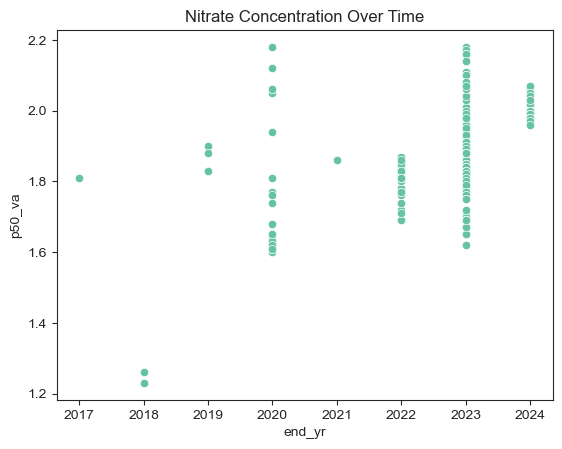

In [78]:
sns.scatterplot(data=nitrate, x='end_yr', y='p50_va')
#sns.pairplot(nitrate, diag_kind='kde')
plt.title('Nitrate Concentration Over Time')
plt.show()

## Discharge

In [ ]:
discharge=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_Discharge_Cont_30Days.csv', sep=';', dtype_backend="numpy_nullable")
print(discharge)

     month_nu  day_nu  begin_yr  end_yr  count_nu  p50_va
0           1       1      2003    2022        15      77
1           1       2      2003    2022        15      78
2           1       3      2003    2022        16      75
3           1       4      2003    2022        16      72
4           1       5      2003    2022        16      73
..        ...     ...       ...     ...       ...     ...
361        12      27      2003    2022        16      71
362        12      28      2003    2022        15      78
363        12      29      2003    2022        15      78
364        12      30      2003    2022        15      77
365        12      31      2003    2022        15      77

[366 rows x 6 columns]


In [80]:
discharge=discharge.drop(columns=['begin_yr','count_nu'])
print(discharge)

     month_nu  day_nu  end_yr  p50_va
0           1       1    2022      77
1           1       2    2022      78
2           1       3    2022      75
3           1       4    2022      72
4           1       5    2022      73
..        ...     ...     ...     ...
361        12      27    2022      71
362        12      28    2022      78
363        12      29    2022      78
364        12      30    2022      77
365        12      31    2022      77

[366 rows x 4 columns]


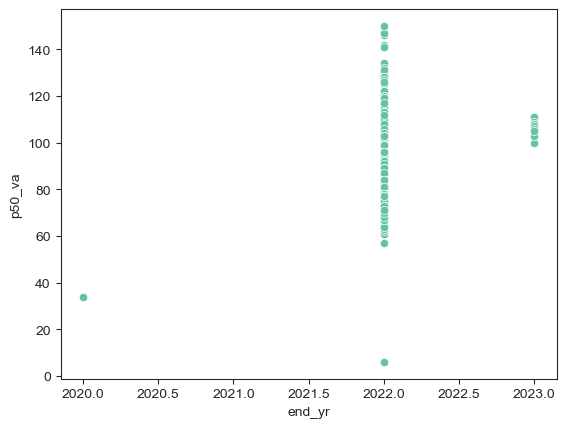

In [81]:
sns.scatterplot(data=discharge, x='end_yr', y='p50_va')
#sns.pairplot(discharge, diag_kind='kde')
plt.show()

## Stream Level

In [ ]:
stream_level=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_StreamLevel_Cont_30Days.csv', sep=';', dtype_backend="numpy_nullable")
print(stream_level)

     month_nu  day_nu  begin_yr  end_yr  count_nu  p50_va
0           1       1      2015    2022         8    42.3
1           1       2      2015    2022         8   42.58
2           1       3      2015    2022         8   43.18
3           1       4      2015    2022         8    43.7
4           1       5      2015    2022         8   44.06
..        ...     ...       ...     ...       ...     ...
361        12      27      2015    2022         8   42.13
362        12      28      2015    2022         8   42.28
363        12      29      2015    2022         8   42.24
364        12      30      2015    2022         8   42.26
365        12      31      2015    2022         8   42.29

[366 rows x 6 columns]


In [83]:
stream_level=stream_level.drop(columns=['begin_yr','count_nu'])
print(stream_level)

     month_nu  day_nu  end_yr  p50_va
0           1       1    2022    42.3
1           1       2    2022   42.58
2           1       3    2022   43.18
3           1       4    2022    43.7
4           1       5    2022   44.06
..        ...     ...     ...     ...
361        12      27    2022   42.13
362        12      28    2022   42.28
363        12      29    2022   42.24
364        12      30    2022   42.26
365        12      31    2022   42.29

[366 rows x 4 columns]


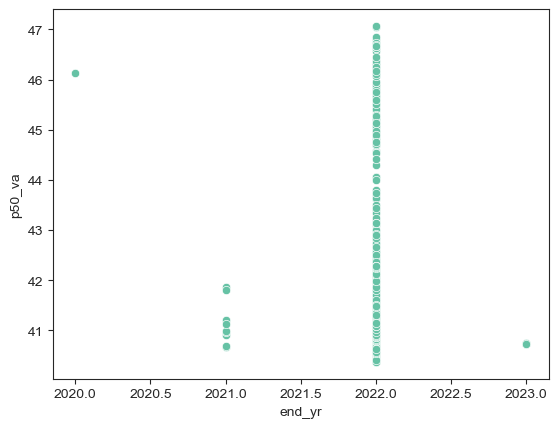

In [84]:
sns.scatterplot(data=stream_level, x='end_yr', y='p50_va')
#sns.pairplot(stream_level, diag_kind='kde')
plt.show()

In [85]:
# Merge nitrate and discharge on ['month_nu', 'day_nu', 'end_yr']
merged_nd = pd.merge(stream_level, discharge, on=['month_nu', 'day_nu', 'end_yr'], how='inner', suffixes=('_streamlevel', '_discharge'))
# Merge the result with stream_level on ['month_nu', 'day_nu', 'end_yr']
merged5 = pd.merge(merged_nd, nitrate, on=['month_nu', 'day_nu', 'end_yr'], how='inner', suffixes=('', '_nitrate'))

In [86]:
print(merged5)

    month_nu  day_nu  end_yr  p50_va_streamlevel  p50_va_discharge  p50_va
0          2       9    2022               45.96                61     1.8
1          2      15    2022               46.11                71    1.72
2          2      16    2022               45.68                77    1.69
3          2      17    2022                45.3                72    1.69
4          2      18    2022               45.06                74    1.71
5          2      19    2022               45.14                69    1.74
6          2      20    2022                45.2                68    1.76
7          2      21    2022               45.22                66    1.78
8          2      22    2022               45.08                64     1.8
9          2      23    2022               44.73                63    1.82
10         2      24    2022               44.56                77    1.77
11         2      25    2022                44.7                86    1.77
12         2      26    2

## Merging Nitrate, Discharge and Stream level

Merged data got 30 days of values. because it was hard to merge before selection of common dates. And in 30 days data there are more 350 rows meaning it is not 30 days. Years are changing from variable to variable. So, I collected all of them on common dates. 

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
dataset2concat= pd.concat([nitrate, discharge, stream_level], axis=1)
print(dataset2concat)

     month_nu  day_nu  end_yr  p50_va  month_nu  day_nu  end_yr  p50_va  \
0           1       1    2023    1.75         1       1    2022      77   
1           1       2    2023    1.72         1       2    2022      78   
2           1       3    2023    1.71         1       3    2022      75   
3           1       4    2023     1.7         1       4    2022      72   
4           1       5    2023     1.7         1       5    2022      73   
..        ...     ...     ...     ...       ...     ...     ...     ...   
361        12      28    2023    1.76        12      27    2022      71   
362        12      29    2023    1.75        12      28    2022      78   
363        12      30    2023    1.75        12      29    2022      78   
364        12      31    2023    1.75        12      30    2022      77   
365      <NA>    <NA>    <NA>    <NA>        12      31    2022      77   

     month_nu  day_nu  end_yr  p50_va  
0           1       1    2022    42.3  
1           1      

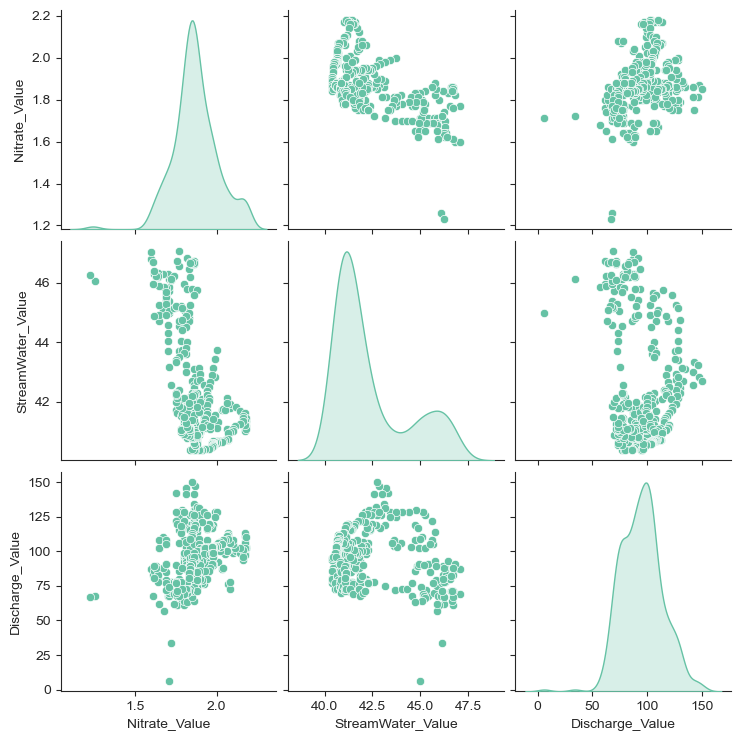

In [89]:
# Rename columns for clarity before plotting
dataset2concat.columns = [
    'nitrate_month_nu', 'nitrate_day_nu', 'nitrate_end_yr', 'Nitrate_Value',
    'discharge_month_nu', 'discharge_day_nu', 'discharge_end_yr', 'Discharge_Value',
    'streamlevel_month_nu', 'streamlevel_day_nu', 'streamlevel_end_yr', 'StreamWater_Value'
]

sns.pairplot(
    dataset2concat,
    vars=['Nitrate_Value', 'StreamWater_Value', 'Discharge_Value'],
    diag_kind='kde'
)

In [90]:
dataset2=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/MDBlue_NitrateDischargeLevel_Combined.csv', sep=';', dtype_backend="numpy_nullable")

In [91]:
dataset2dropped=dataset2.drop(columns=['Month','Day','End_Year'])
print(dataset2dropped)

    Nitrate_Value  StreamWater_Value  Discharge_Value        Time
0             1.8              45.96               61  2022-02-09
1            1.72              46.11               71  2022-02-15
2            1.69              45.68               77  2022-02-16
3            1.69               45.3               72  2022-02-17
4            1.71              45.03               74  2022-02-18
5            1.74              45.14               69  2022-02-19
6            1.76               45.2               68  2022-02-20
7            1.78              45.22               66  2022-02-21
8             1.8              45.08               64  2022-02-22
9            1.82              44.73               63  2022-02-23
10           1.77              44.56               77  2022-02-24
11           1.77               44.7               86  2022-02-25
12           1.83              44.81               89  2022-02-26
13           1.87              40.81               86  2022-06-15
14        

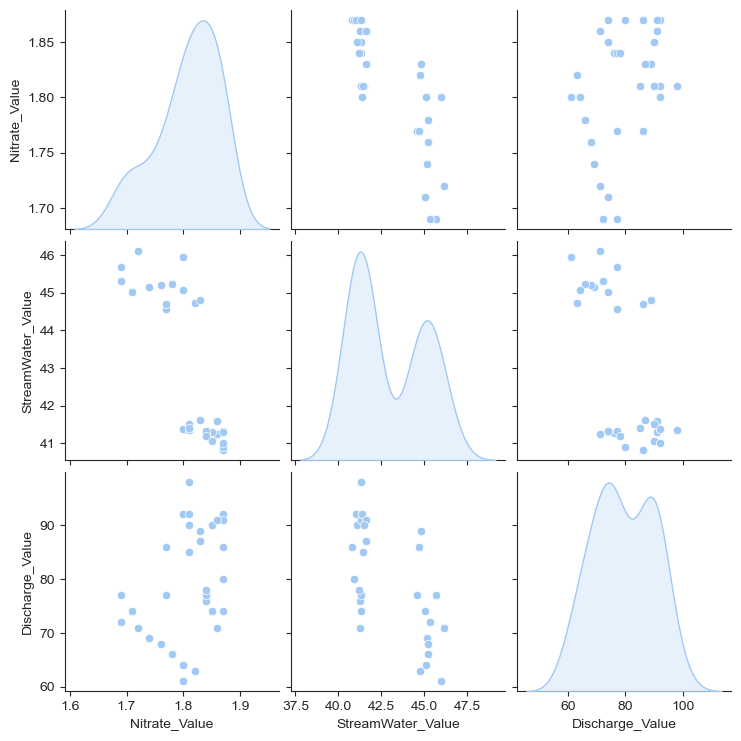

In [92]:
sns.set_palette("pastel")
sns.pairplot(dataset2dropped, vars=['Nitrate_Value', 'StreamWater_Value', 'Discharge_Value'], diag_kind='kde')
plt.show()

## Heatmap

In [93]:
# Convert time to minutes from the first timestamp
import numpy as np
import datetime
from datetime import datetime

t_string = dataset2dropped.iloc[:, 3].values
t = []
t_0 = 0
for i in range(len(t_string)):
    # Convert numpy.datetime64 to pandas.Timestamp, then to python datetime
    a = pd.Timestamp(t_string[i]).to_pydatetime()
    if i == 0:
        t_0 = a.timestamp()
        print(t_0)
    dk = (a.timestamp()-t_0) / 60
    t.append(dk)
    print(dk)
minute_time = np.array(t)

1644361200.0
0.0
8640.0
10080.0
11520.0
12960.0
14400.0
15840.0
17280.0
18720.0
20160.0
21600.0
23040.0
24480.0
181380.0
182820.0
184260.0
185700.0
187140.0
188580.0
190020.0
191460.0
192900.0
194340.0
195780.0
197220.0
201540.0
202980.0
205860.0
207300.0
208740.0
210180.0


In [94]:
dataset2droppedconcat = dataset2dropped.copy()
dataset2droppedconcat['dk'] = minute_time

<Axes: >

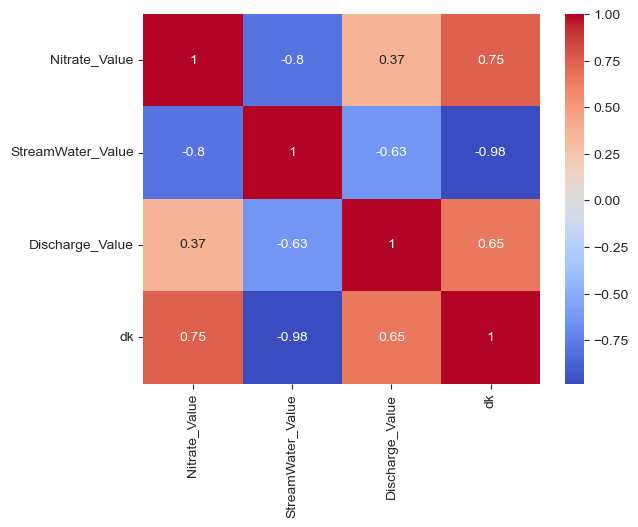

In [95]:
# Select only numeric columns for correlation
numeric_cols = dataset2droppedconcat.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')

<Axes: >

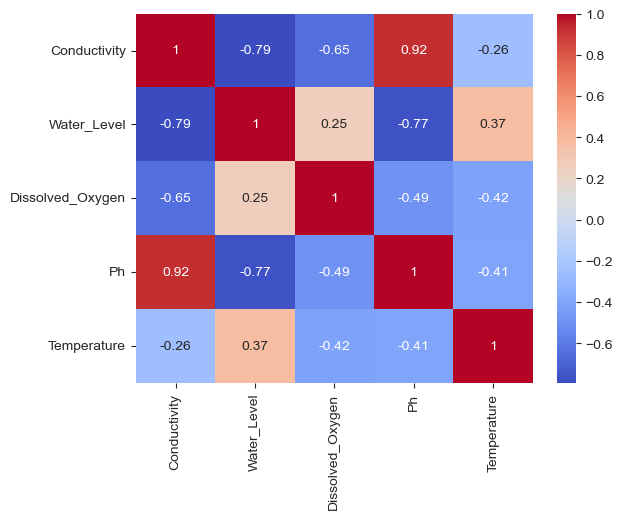

In [96]:
# Compute the correlation matrix for the selected columns
corr = merged_final[['Conductivity', 'Water_Level', 'Dissolved_Oxygen', 'Ph', 'Temperature']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Variable', ylabel='Value'>

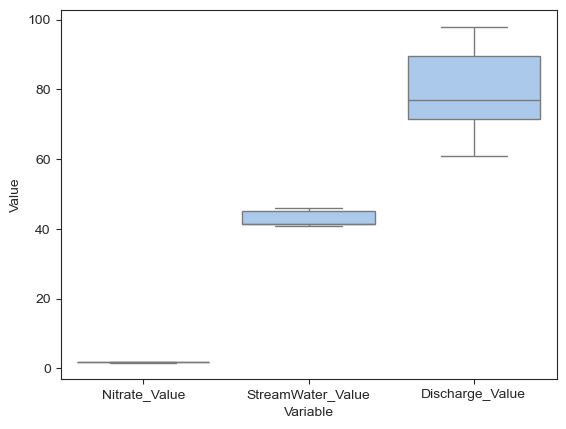

In [ ]:
import seaborn as sns

#Dataset2 boxplots
dataset2_boxplot= dataset2droppedconcat.melt(id_vars=['Time'], value_vars=['Nitrate_Value', 'StreamWater_Value', 'Discharge_Value'],
									var_name='Variable', value_name='Value')

sns.boxplot(data=dataset2_boxplot, x='Variable', y='Value')



<Axes: xlabel='Variable', ylabel='Value'>

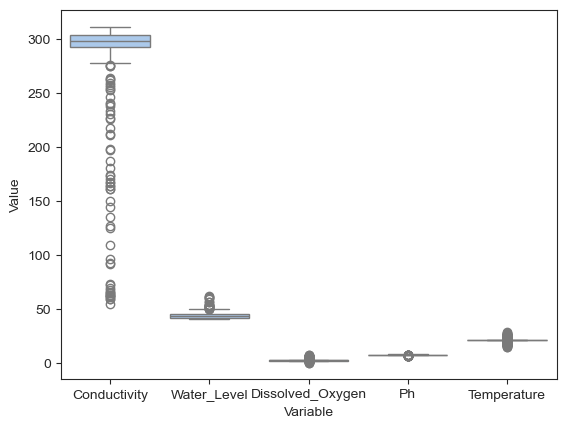

In [101]:
## dataset1 boxplots
dataset1_boxplot = dk_merged.melt(
	id_vars=['timestamps'], 
	value_vars=['Conductivity', 'Water_Level', 'Dissolved_Oxygen', 'Ph', 'Temperature'],
	var_name='Variable', value_name='Value'
)

sns.boxplot(data=dataset1_boxplot, x='Variable', y='Value')
